James Telzrow \
2023-05-23 \
Warburton Lab \
Schrodinger Time Independent Particle In Box

## Introduction

This notebook describes the process of analytically solving the *Time-independent Schrodinger equation* for the ["Particle In a Box"](https://en.wikipedia.org/wiki/Particle_in_a_box) problem.
If you aren't interested in the derivation of the analytical solutions and just wish to find and  plot them, then scroll down to  the section entitled **Plotting Analytical Solution**.
The contents of this notebook are based partially on the following source:

* David Morin. "Waves (Draft), Chapter 10: Introduction to quantum mechanics".  19 July 2010. [Author's academic web site](https://scholar.harvard.edu/david-morin/waves).

Suppose there exists a particle in a one-dimensional box on the real line.
Let this box be bounded on the left by $0$, and bounded on the right by some number $L$.
Let the particle have mass $m$, a definite quantity of energy $E$, and potential energy $V(x)$ that is equal to zero on $(0, L)$ and equal to $\infty$ everywhere else.
Then this particle's wave functions $\psi(x)$ are those that satisfy the *Time-independent Schrodinger equation*:
$$
\begin{equation*}
E\psi(x) = -\frac{\hbar^2}{2m}\frac{d^2\psi(x)}{dx^2} + V(x)\psi(x)
\end{equation*}
$$
where $\hbar$ is the reduced Planck constant, $\hbar = \frac{h}{2\pi}$.

## Analytical Solution

Because the particle cannot leave the box, $|\psi(x)|^2 = 0$ must be true for all $x$ not in the interval $(0, L)$.
Additionally, we are given that the potential energy of the particle is zero within the box (on the interval $(0, L)$).
We wish to solve for the continuous wave function, $\psi(x)$, on the interval $(0, L)$.
To do this, we begin by setting up the following differential equation:

In [1]:
from sympy import dsolve, Eq, Function, Rational, symbols
E, hbar, m, x = symbols('E, hbar, m, x')
psi = Function('psi')
schrod_eq = Eq(E*psi(x), -1*(hbar**2/(2*m))*psi(x).diff(x, x) + 0*psi(x))
schrod_eq


Eq(E*psi(x), -hbar**2*Derivative(psi(x), (x, 2))/(2*m))

Now consider the particle's total energy $E$, and recall three facts:
1. Every particle can be represented as a wave with a frequency $\omega$ and a wavenumber $k$.
2. The total energy of a particle equals the reduced Planck constant times its wavelength: $E = \hbar\omega$.
3. The momentum of a particle, $p$, equals the reduced Planck constant times its wavenumber: $p = \hbar k$.
Now recall that the total energy of this particle is the sum of its kinetic and potential energy.
But within in this box, it has no potential energy, meaning its total energy equals its kinetic energy.
Therefore, letting $v$ denote the particle's velocity, the total energy $E$ is given by
$$
E = \frac{1}{2}mv^2 + 0 = \frac{p^2}{2m} = \frac{\hbar^2 k^2}{2m}
$$
We substitute this expression for $E$ in the equation above:

In [2]:
k = symbols('k')
schrod_eq = schrod_eq.subs(E, hbar**2 * k**2 / (2*m))
schrod_eq


Eq(hbar**2*k**2*psi(x)/(2*m), -hbar**2*Derivative(psi(x), (x, 2))/(2*m))

And then we solve this linear second-order homogeneous differential equation:

In [3]:
result = dsolve(schrod_eq, psi(x))
result


Eq(psi(x), C1*exp(-I*k*x) + C2*exp(I*k*x))

We can simplify this using Euler's formula: $e^{i\theta} = \cos(\theta) + i\sin(\theta)$

In [4]:
from sympy import collect, cos, exp, sin


def sort_func(symbol):
    """Sorts SymPy Symbols alphabetically by their name
    """
    return symbol.name

# result_free_symbols is a set, so solving the differential equation and
# then iterating through the free symbols on different occasions may 
# yield the symbols in a different order. To overcome this, we put them 
# in a list and then organize it alphabetically by symbol name
free_symbols = [symbol for symbol in result.free_symbols if not symbol.equals(
    x) and not symbol.equals(k)]
free_symbols.sort(key=sort_func)
C1, C2 = free_symbols
result = Eq(psi(x), collect(result.rewrite(exp, sin).expand().rhs,
            [sin(k*x), cos(k*x)], evaluate=True))
result


Eq(psi(x), (C1 + C2)*cos(k*x) + (-I*C1 + I*C2)*sin(k*x))

Recall that $\psi(x)$ is continuous, and must equal zero at $x = 0$ and $x = L$.
We can use this information to simplify our solution further:

In [5]:
from IPython.display import display
left_boundary_cond = Eq(0, result.rhs.subs(x, 0))
print('Left boundary condition:')
display(left_boundary_cond)
L = symbols('L')
right_boundary_cond = Eq(0, result.rhs.subs({C2: -C1, x: L}))
print('Right boundary condition:')
display(right_boundary_cond)


Left boundary condition:


Eq(0, C1 + C2)

Right boundary condition:


Eq(0, -2*I*C1*sin(L*k))

In order to avoid the trivial case where $-2iC_1 = 0$, we let $0 = \sin(Lk)$, meaning that $Lk = n\pi \rightarrow k = \frac{n\pi}{L}$, where $n$ is any integer.
But recall that $E = \frac{\hbar^2 k^2}{2m} = \frac{\hbar^2 n^2 \pi^2}{2mL^2}$.
And because in this example $E$ is equal to the particle's kinetic energy, $n$ cannot be negative.
And $n$ also must not be zero, because then the particle has no energy and is completely still.
Thus, $k = \frac{n\pi}{L}$ where $n$ is any positive integer.
Therefore, our solution is:

In [6]:
from sympy import pi, Symbol
n = Symbol('n', positive=True, integer=True)
result = result.subs({C2: -C1, k: n*pi/L})
display(result)


Eq(psi(x), -2*I*C1*sin(pi*n*x/L))

But recall that $C_1$ is an arbitrary (possibly complex) constant, so for simplicity we can replace $-2iC_1$ with another possibly complex constant $A$:

In [7]:
from sympy import I
# In SymPy, real and imaginary numbers are complex
A = Symbol('A', complex=True)
result = result.subs(-2*I*C1, A)
display(result)


Eq(psi(x), A*sin(pi*n*x/L))

But recall that the squared magnitude of $\psi(x)$ is a probability density function, and $\psi(x) = 0$ for all $x$ outside of the interval $(0, L)$.
Therefore,
$$
\int_0^L |\psi(x)|^2 dx = 1 =
\int_0^L |A \sin\big(\frac{\pi n x}{L}\big)|^2 dx =
4\int_0^L |A \sin\big(\frac{\pi n x}{L}\big)|^2 dx
$$
Because $\sin\big(\frac{\pi n x}{L}\big)$ is a real number for every $x$ in $(0, L)$, then
$$
\int_0^L |A \sin\big(\frac{\pi n x}{L}\big)|^2 dx = 
|A|^2 \int_0^L \sin\big(\frac{\pi n x}{L}\big)^2 dx
$$
We can evaluate this latter integral:

In [8]:
from sympy import integrate, Abs
integrand = sin(pi*n*x/L)**2
# Exclude case where pi*n/L = 0
integration_result = integrate(integrand, (x, 0, L)).args[0][0]
integration_result


L/2

This means that our constant $A$ must satisfy:

In [9]:
from sympy import solve, sqrt
abs_A = Symbol('abs_A')
# Take the principal square root, since we are solving for |A|
abs_A = solve(
    Eq(1, Abs(A)**2*integration_result).subs(Abs(A), abs_A), abs_A)[1]
abs_A_eq = Eq(Abs(A), abs_A)
display(abs_A_eq)


Eq(Abs(A), sqrt(2)*sqrt(1/L))

There are obviously infinitely many complex solutions to this equation, but there are only two real solutions.
For simplicity, we choose the positive solution: $A = \sqrt{\frac{2}{L}}$.

Now consider the solution again:

In [10]:
display(result)


Eq(psi(x), A*sin(pi*n*x/L))

and note that it depends on $n$.
Also recall the energy of the particle: $E = \frac{\hbar^2 n^2 \pi^2}{2mL^2}$, and note that $E$ increases as $n$ increases. Additionally, recall that $n$ is always a positive integer.
In this way, the values of $n$ correspond to the different energy levels at which the particle exists, and for each energy level, there exists a corresponding wave function $\psi_n(x)$.

## Plotting Analytical Solution

The code below plots $|\psi_n(x)|^2$ on the interval $(0, \verb|length|)$ given the length of the box `length` in Angstroms, a list of positive integr values for $n$ corresponding to energy levels, the number of evenly spaced points on the x-axis at which to evaluate $|\psi(x)|^2$, and the mass of the particle, in atomic mass units.
It also calculates the amount of energy $E_n$, in electronvolts, that the particle posesses at each energy level, and horizontally shifts the graph of $|\psi_n(x)|^2$ by this amount.

**Note:** All the above cells must be executed in order to run the two cells below.
You can do this quickly in VSCode/GitHub Codespaces by clicking the code cell below and then pressing the "Execute Above Cells" button on the top right edge of the cell, which is that with a right-pointing triangle and an upward-pointing arrow.
All together, these cells should take no more than a few seconds to run.

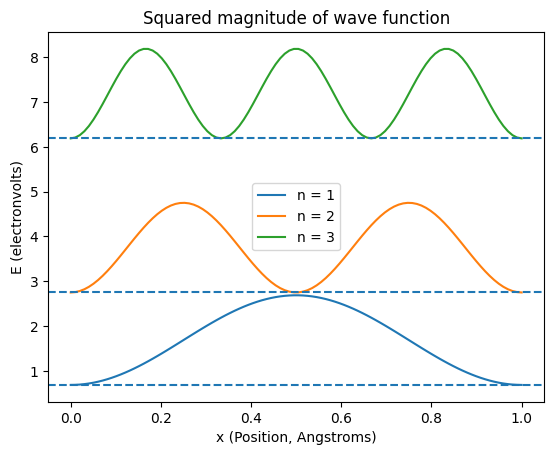

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import lambdify

# Length of the box in Angstroms (x-coordinate of the box's right side)
length = 1
n_values = [1, 2, 3,]  # Energy Levels
number_of_eval_points = 100

# Mass of the particle, in atomic mass units (chosen to adequately
# seperate curves in graph)
mass = 0.03

# Plot a horizontal line at each energy level, which acts as the
# "bottom" of the probability density function |psi(x)|^2
show_energy_as_horizontal_line = True

# Reduced Planck Constant, in Joule seconds
hbar = 1.054_571_817e-34

if length <= 0:
    raise ValueError('length must be positive')
if hbar <= 0:
    raise ValueError('Reduced Planck Constant must be positive')
if mass <= 0:
    raise ValueError('Mass must be positive')

# Convert Angstroms to meters
L_value = length * 1e-10
# Convert atomic mass units to kilograms
m_value = mass * 1.660_540_199e-27

# given a value (or an array of values) for x and and a value for n,
# lambdified_psi_mag_sq quickly returns the floating point value of
# |psi_n(x)|^2
lambdified_psi_mag_sq = lambdify([x, n], Abs(
    result.subs({A: abs_A_eq.rhs, L: L_value}).rhs)**2, 'numpy')
eval_points = np.linspace(0, L_value, number_of_eval_points)

energy_expression = (hbar**2 * n**2 * pi**2)/(2*m*L**2)
lambdified_nrg_expr = lambdify(n, energy_expression.subs(
    {hbar: hbar, m: m_value, L: L_value}))

for n_value in n_values:
    if type(n_value) != int:
        raise ValueError('n_values must be integers')
    elif n_value < 1:
        raise ValueError('n_values must be positive')
    psi_mag_sq_vals = lambdified_psi_mag_sq(eval_points, n_value)
    energy_val = lambdified_nrg_expr(n_value)
    # Convert Joules to electronvolts
    energy_val_ev = energy_val * 6.241_509_074e18
    # Convert meters to Angstroms (essentially stretch the x-axis by a
    # factor of 1e10)
    eval_points_A = eval_points * 1e10
    # Since we stretched the x-axis by factor of 1e10, we must
    # scale the y-axis by a factor of 1e-10, so that the integral across
    # the length of the box remains equal to 1
    psi_mag_sq_vals_sc = psi_mag_sq_vals * 1e-10
    psi_mag_sq_vals_sc += energy_val_ev
    plt.plot(eval_points_A, psi_mag_sq_vals_sc, label='n = ' + str(n_value))
    if show_energy_as_horizontal_line:
        plt.axhline(y=energy_val_ev, linestyle='dashed')

plt.xlabel('x (Position, Angstroms)')
plt.ylabel('E (electronvolts)')
plt.title('Squared magnitude of wave function')
plt.legend()


The code below displays the general analytic solution $\psi(x)$, and plots $\psi_n(x)$ on the interval $(0, \verb|length|)$, using the values of `length`, the energy levels, the number of evaluation points, and particle mass supplied in the previous code cell.
Like the previous cell, this calculates the amount of energy (in electronvolts) that the particle posesses at each energy level and horizontally shifts the graph of $\psi_n(x)$ by this amount.
Although the constant $A$ in the solution could be any one of infinitely many complex numbers of magnitude $\sqrt{\frac{2}{L}}$, this code replaces $A$ with the positive real value $\sqrt{\frac{2}{L}}$ for simplicity (where $L$ is the length of the box in meters, not Angstroms, and is determined by multiplying the value of `length` by a conversion factor.)

Analytic Solution:


Eq(psi(x), A*sin(pi*n*x/L))

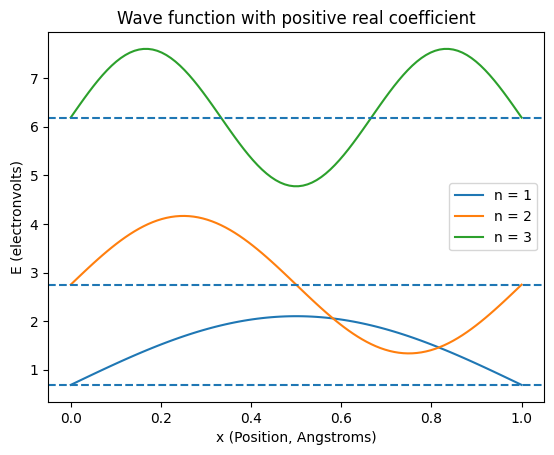

In [29]:
print('Analytic Solution:')
display(result)

# given a value (or an array of values) for x and and a value for n,
# lambdified_psi quickly returns the floating point value of psi_n(x)
lambdified_psi = lambdify([x, n], result.subs(
    {A: abs_A_eq.rhs, L: L_value}).rhs, 'numpy')

for n_value in n_values:
    if type(n_value) != int:
        raise ValueError('n_values must be integers')
    elif n_value < 1:
        raise ValueError('n_values must be positive')
    psi_vals = lambdified_psi(eval_points, n_value)
    energy_val = lambdified_nrg_expr(n_value)
    # Convert Joules to electronvolts
    energy_val_ev = energy_val * 6.241_509_074e18
    # Convert meters to Angstroms (essentially stretch the x-axis by a 
    # factor of 1e10)
    eval_points_A = eval_points * 1e10
    # Since we stretched the x-axis by a factor of 1e10, and since we 
    # must have that the integral of the squared magnitude of psi_vals 
    # across the length of the box equals to one, we must scale the 
    # y-axis by a factor  of 1e-5
    psi_vals_sc = psi_vals * 1e-5
    psi_vals_sc += energy_val_ev
    plt.plot(eval_points_A, psi_vals_sc, label='n = ' + str(n_value))
    plt.axhline(y=energy_val_ev, linestyle='dashed')

plt.xlabel('x (Position, Angstroms)')
plt.ylabel('E (electronvolts)')
plt.title('Wave function with positive real coefficient')
plt.legend()
